In [26]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
# import seaborn as sns

os.getcwd()

'/home/mgteus/workspace/neuro/transformers_andrej'

In [27]:
from attention_model import Head, get_batch1d, get_batch2d, RMSELoss, MultiHeadAttention

In [28]:
# from torchtune.modules import RotaryPositionalEmbeddings

In [88]:
CONTEXT_LEN = 128
BATCH_SIZE = 1024
DROPOUT = 0.1
LEARNING_RATE = 1e-5
NUM_HEADS = 2
NUM_EPOCHS = 1e3
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [89]:
DEVICE, NUM_EPOCHS

('cuda', 1000.0)

In [32]:
# model = Head(context_len=CONTEXT_LEN, batch_size=BATCH_SIZE, dropout=DROPOUT)
# optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [33]:
1e3

1000.0

In [90]:
# model = Head(context_len=CONTEXT_LEN, batch_size=BATCH_SIZE, dropout=DROPOUT)
model = MultiHeadAttention(
                num_heads = NUM_HEADS
            , context_len = CONTEXT_LEN
            , batch_size = BATCH_SIZE
            , dropout = DROPOUT
            ,head_output_dim=2)
model = model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [91]:
xb, yb = get_batch2d(context_len=CONTEXT_LEN, batch_size=BATCH_SIZE, split='train', device=DEVICE)

In [92]:
head = Head(context_len=CONTEXT_LEN, batch_size=4, dropout=0, output_dim=2)

In [93]:
loss_list = []

In [94]:
for epoch in range(int(NUM_EPOCHS)):
    xb, yb = get_batch2d(context_len=CONTEXT_LEN, batch_size=BATCH_SIZE, split='train', device=DEVICE)
    optimizer.zero_grad(set_to_none=True)
    predictions = model(xb)
    predictions = predictions.to(DEVICE)
    loss = RMSELoss(predictions, yb)
    loss.backward()
    optimizer.step()
    
    if epoch%100==0:
        loss_list.append(loss.cpu().detach().numpy())
        print(f"iter. {epoch} - loss = {loss.item():4f}")


iter. 0 - loss = 0.541469
iter. 100 - loss = 0.483441
iter. 200 - loss = 0.425942
iter. 300 - loss = 0.374378
iter. 400 - loss = 0.330748
iter. 500 - loss = 0.295928
iter. 600 - loss = 0.269151
iter. 700 - loss = 0.243504
iter. 800 - loss = 0.230946
iter. 900 - loss = 0.220813


In [95]:
loss.cpu().detach().numpy()

array(0.21610285, dtype=float32)

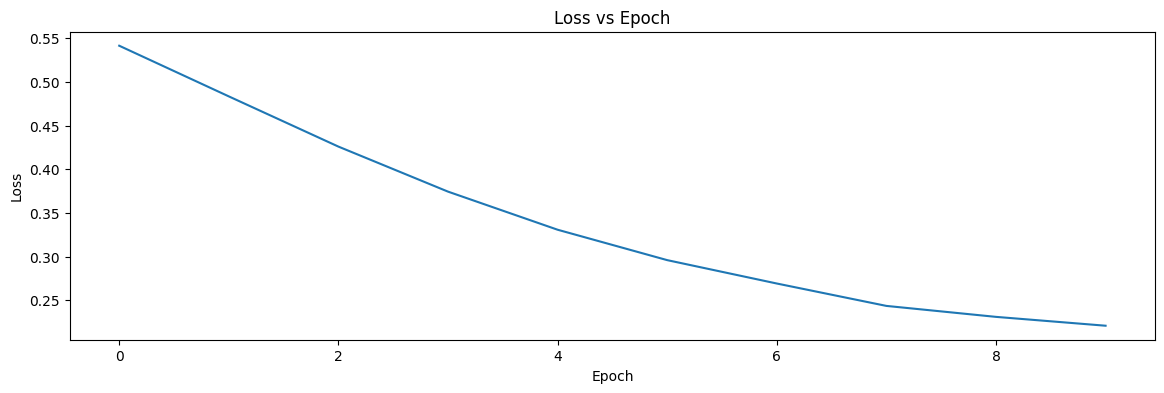

In [96]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(loss_list)
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [97]:
np.std(loss_list)

0.10590735

In [99]:
np_predictions = predictions.cpu().detach().numpy()
np_context = xb.cpu().detach().numpy()
np_true = yb.cpu().detach().numpy()

In [82]:
np_predictions.shape

(1024, 128, 2)

In [104]:
np_context[0,0:2,:]

array([[0.5527855 , 0.21641898],
       [0.5638899 , 0.21361794]], dtype=float32)

In [116]:
pred_rmse = model(xb[0:1,0:1,:]).cpu().detach().numpy()
model(xb[0:1,0:1,:]).cpu().detach().numpy()

array([[[0.31984884, 0.5014201 ]]], dtype=float32)

In [117]:
np_true[0:1,0:1,:]

array([[[0.5638899 , 0.21361794]]], dtype=float32)

In [130]:
(pred_rmse - np_true[0:1,0:1,:])

array([[[-0.24404109,  0.28780216]]], dtype=float32)

In [131]:
(pred_rmse - np_true[0:1,0:1,:])**2

array([[[0.05955605, 0.08283009]]], dtype=float32)

In [132]:
np.sqrt((pred_rmse - np_true[0:1,0:1,:])**2)

array([[[0.24404109, 0.28780216]]], dtype=float32)

In [134]:
nnmseloss = nn.MSELoss()
nnmseloss(pred_rmse,np_true[0:1,0:1,:])

TypeError: 'int' object is not callable

In [111]:
RMSELoss(model(xb[0:1,0:2,:]), np_true[0:1,0:2,:])

TypeError: 'int' object is not callable

In [105]:
np_predictions[0,0:2,:]

array([[0.31969303, 0.5013214 ],
       [0.47985852, 0.5221048 ]], dtype=float32)

In [103]:
np_true[0,0:2,:]

array([[0.5638899 , 0.21361794],
       [0.579599  , 0.21407092]], dtype=float32)

In [24]:
# for i in range(BATCH_SIZE):
#     plt.title(f'Plot Batch {i}')
#     plt.scatter(np_predictions[i, -1, 0], np_predictions[i, -1, 1], label='predictions', c='r')
#     plt.scatter(np_context[i, :,0], np_context[i, :, 1], label='Context', c=[color for color in range(60)], alpha=0.4, marker='^')
#     plt.scatter(np_true[i, -1, 0], np_true[i, -1, 1], label='True', c='k', marker='^')
#     plt.legend()
#     plt.colorbar(label='context steps')
#     # plt.xlim(0, 1)
#     # plt.ylim(0, 1)
#     plt.show()

In [19]:
print(model)

MultiHeadAttention(
  (pose): PositionEncoding()
  (linear_both): Linear(in_features=4, out_features=2, bias=False)
  (heads): ModuleList(
    (0-1): 2 x Head(
      (pos_to_enc_layer): Linear(in_features=2, out_features=2, bias=True)
      (enc_layer): Linear(in_features=2, out_features=1, bias=True)
      (output_layer): Linear(in_features=64, out_features=2, bias=True)
      (key): Linear(in_features=2, out_features=64, bias=True)
      (query): Linear(in_features=2, out_features=64, bias=True)
      (values): Linear(in_features=2, out_features=64, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
)


In [62]:
np_context[1, :, :]

array([[1.67804435e-01, 6.98494792e-01],
       [1.56310618e-01, 6.82408869e-01],
       [1.45869181e-01, 6.67860270e-01],
       [1.31759182e-01, 6.64547384e-01],
       [1.20891437e-01, 6.61400497e-01],
       [1.14728980e-01, 6.59400344e-01],
       [1.08289488e-01, 6.55428767e-01],
       [9.85054299e-02, 6.45973027e-01],
       [9.40657854e-02, 6.33602083e-01],
       [8.86281133e-02, 6.25117719e-01],
       [8.50356743e-02, 6.12839103e-01],
       [8.09845030e-02, 5.98857939e-01],
       [8.36934149e-02, 5.83317518e-01],
       [7.77372271e-02, 5.67210615e-01],
       [6.99557737e-02, 5.55439711e-01],
       [6.89986646e-02, 5.39084494e-01],
       [6.59783706e-02, 5.25745869e-01],
       [5.59081212e-02, 5.12945414e-01],
       [5.02338745e-02, 4.98433799e-01],
       [4.59442250e-02, 4.87649441e-01],
       [3.76879871e-02, 4.71754223e-01],
       [3.84346731e-02, 4.51453716e-01],
       [3.90720740e-02, 4.36441213e-01],
       [4.22170162e-02, 4.24269974e-01],
       [4.916669

In [21]:
np.mean(np_context[1, :, :], axis=0)

array([0.6014748 , 0.77471024], dtype=float32)

In [22]:
xb[1, :1, :].shape, xb.shape

(torch.Size([1, 2]), torch.Size([512, 64, 2]))

In [23]:
xb[1,:30, :].shape

torch.Size([30, 2])

In [63]:
print('input', xb[1,1:11, :],)
print('media', np.mean(np_context[1,:11, :], axis=0))
print('predict', model(xb[:1,:30, :]))
print('true', yb[1, 10:11, :])

input tensor([[0.1563, 0.6824],
        [0.1459, 0.6679],
        [0.1318, 0.6645],
        [0.1209, 0.6614],
        [0.1147, 0.6594],
        [0.1083, 0.6554],
        [0.0985, 0.6460],
        [0.0941, 0.6336],
        [0.0886, 0.6251],
        [0.0850, 0.6128]], device='cuda:0')
media [0.11926258 0.6551885 ]
predict tensor([[[0.3507, 0.9548],
         [0.3507, 0.9575],
         [0.3512, 0.9612],
         [0.3514, 0.9649],
         [0.3515, 0.9686],
         [0.3515, 0.9722],
         [0.3510, 0.9757],
         [0.3506, 0.9778],
         [0.3507, 0.9785],
         [0.3510, 0.9786],
         [0.3512, 0.9781],
         [0.3514, 0.9770],
         [0.3512, 0.9756],
         [0.3509, 0.9739],
         [0.3506, 0.9721],
         [0.3502, 0.9701],
         [0.3495, 0.9679],
         [0.3485, 0.9657],
         [0.3472, 0.9635],
         [0.3458, 0.9613],
         [0.3441, 0.9592],
         [0.3424, 0.9571],
         [0.3406, 0.9550],
         [0.3388, 0.9528],
         [0.3371, 0.9507],
   

In [ ]:
xb[1,:30, :]

In [25]:
model(xb[:1,:30, :])[0][0][0]

tensor(0.8220, grad_fn=<SelectBackward0>)

In [26]:
xb.shape

torch.Size([16, 30, 2])

In [ ]:
model(xb[1,30:32, :])

In [ ]:
model(xb[1,:30, :]).shape

In [ ]:
model(xb[1,0:i, :])

In [ ]:
yb[1,0:i, :]

In [ ]:
model(xb[1,i-1:i, :])[-1]

In [ ]:
np_true[1, i-1:i,0]

In [59]:
i=10

In [67]:
np_context[1,0:i+1, 0]

array([0.6671843 , 0.68330425, 0.69833046, 0.7142348 , 0.7268465 ,
       0.73882365, 0.75323457, 0.76656795, 0.7723649 , 0.77628666,
       0.7793129 ], dtype=float32)

In [68]:
np_true[1, i-1:i,0], np_true[1, i-1:i,1]

(array([0.7793129], dtype=float32), array([0.18371972], dtype=float32))

In [69]:
model(xb[:1,i-1:i, :])[0][0][0], model(xb[:1,i-1:i, :])[0][0][1]

(tensor(0.9400, grad_fn=<SelectBackward0>),
 tensor(0.1796, grad_fn=<SelectBackward0>))

In [70]:
xb[:1,i-1:i, :]

tensor([[[0.9592, 0.1478]]])

In [73]:
for i in range(1, 10):
    print(i, model(xb[:1,i-1:i, :]))

1 tensor([[[0.8220, 0.1418]]], grad_fn=<ViewBackward0>)
2 tensor([[[0.8320, 0.1500]]], grad_fn=<ViewBackward0>)
3 tensor([[[0.8431, 0.1571]]], grad_fn=<ViewBackward0>)
4 tensor([[[0.8520, 0.1693]]], grad_fn=<ViewBackward0>)
5 tensor([[[0.8701, 0.1712]]], grad_fn=<ViewBackward0>)
6 tensor([[[0.8875, 0.1739]]], grad_fn=<ViewBackward0>)
7 tensor([[[0.9014, 0.1761]]], grad_fn=<ViewBackward0>)
8 tensor([[[0.9192, 0.1765]]], grad_fn=<ViewBackward0>)
9 tensor([[[0.9305, 0.1808]]], grad_fn=<ViewBackward0>)


In [71]:
xb[:1,:i, :]

tensor([[[0.8378, 0.1119],
         [0.8481, 0.1200],
         [0.8596, 0.1271],
         [0.8691, 0.1393],
         [0.8877, 0.1408],
         [0.9054, 0.1432],
         [0.9197, 0.1451],
         [0.9378, 0.1451],
         [0.9496, 0.1493],
         [0.9592, 0.1478]]])

In [61]:
xb.shape

torch.Size([16, 30, 2])

In [25]:
# for i in range(1, 30):
#     plt.title(f'Plot Batch 1 | step {i:02d}')
#     plt.scatter(np_context[1,0:i, 0], np_context[1,0:i, 1],  label='Context', c=[color for color in range(len(np_context[1,0:i, 0]))], alpha=0.4, marker='^')
#     plt.scatter(model(xb[:1,i-1:i, :])[0][0][0].item(), model(xb[:1,i-1:i, :])[0][0][1].item(), label='prediction', c='r')
#     plt.scatter(np_true[1, i-1:i,0], np_true[1, i-1:i,1], label='True', c='k', marker='^')
#     plt.legend()
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.colorbar(label='context steps')
#     # plt.xlim(0, 1)
#     # plt.ylim(0, 1)
#     plt.show()

In [ ]:
loss_mean = []
for i in range(1, 31):
    
    loss_mean.append(RMSELoss(model(xb[1,i-1:i, :]), yb[1,i-1:i, :]).detach().numpy())



np.mean(loss_mean)

In [ ]:
np.std(loss_mean)

In [ ]:
np.mean(np_context[1, :, 0]), np.mean(np_context[1, :, 1])

In [ ]:
sns.histplot(np_context[1, :, 0])

In [ ]:
yb[1, :1, :]

In [ ]:
np_predictions[1, 0, :]

In [9]:
key_weight = model.key.weight.detach().numpy()
query_weight = model.query.weight.detach().numpy()
values_weight = model.values.weight.detach().numpy()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

sns.heatmap(key_weight, cmap='viridis', ax=ax[0])
ax[0].set_title('Key Weights')

sns.heatmap(query_weight, cmap='viridis', ax=ax[1])
ax[1].set_title('Query Weights')

sns.heatmap(values_weight, cmap='viridis', ax=ax[2])
ax[2].set_title('Values Weights')
plt.show()